### Quadrature Project

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

#### Gauss Legendre

In [2]:
def gauss_legendre_simple(f, a, b, n):
  nodes, weights = scipy.special.roots_legendre(n)
  return 0.5 * (b-a) * sum([weights[i] * f(nodes[i] * (b-a) * 0.5 + (b+a) * 0.5) for i in range(0, len(nodes))])

In [3]:
# test

def f(x):
  return np.exp(x)

a = 0
b = 3

print("Valeur réelle : " + str(np.exp(b) - np.exp(a)))

print("Approximation avec n = 1 : " + str(gauss_legendre_simple(f, a, b, 1)))

print("Approximation avec n = 3 : " + str(gauss_legendre_simple(f, a, b, 3)))

Valeur réelle : 19.085536923187668
Approximation avec n = 1 : 13.445067211014194
Approximation avec n = 3 : 19.080330458533616


In [4]:
def gauss_legendre(f, n, M, a, b):
  h = (b-a)/M
  return sum([gauss_legendre_simple(f, a + h*i, a + h*(i+1), n) for i in range(0, M)])

In [5]:
print(gauss_legendre(f, 10, 30, a, b))

19.085536923187668


In [6]:
def gauss_legendre_vectorized(f, n, M, a, b):
  nodes, weights = scipy.special.roots_legendre(n)
  h = (b - a) / M

  l = a + nodes.reshape(-1, 1) * h * 0.5 + h * (np.arange(M) + 0.5)
  new_weights = 0.5 * h * weights.reshape(-1, 1)

  return np.sum(np.sum(f(l) * new_weights, axis=0), axis = 0)


In [7]:
print(gauss_legendre_vectorized(f, 2, 5, a, b))

19.084970838691135


#### Error

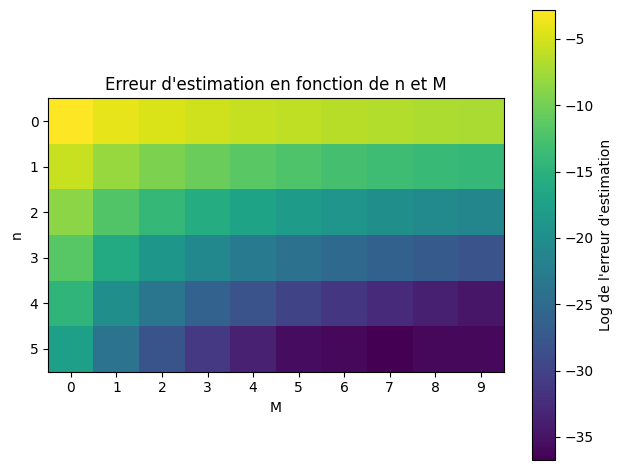

In [8]:
def f(x):
    return np.reciprocal(x)

reel = np.log(5/2)

a = 2
b = 5
M_max = 10 + 1
n_max = 6 + 1

I_tab = [[np.abs(gauss_legendre_vectorized(f, i, j, a, b) - reel) for j in range(1, M_max)] for i in range(1, n_max)]

fig, ax = plt.subplots()
im = ax.imshow(np.log(I_tab))

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label("Log de l'erreur d'estimation")

ax.set_xticks(np.arange(M_max-1))
ax.set_yticks(np.arange(n_max-1))

plt.title("Erreur d'estimation en fonction de n et M")
plt.xlabel("M")
plt.ylabel("n")
fig.tight_layout()

plt.show()


#### Trapezoidal intergration

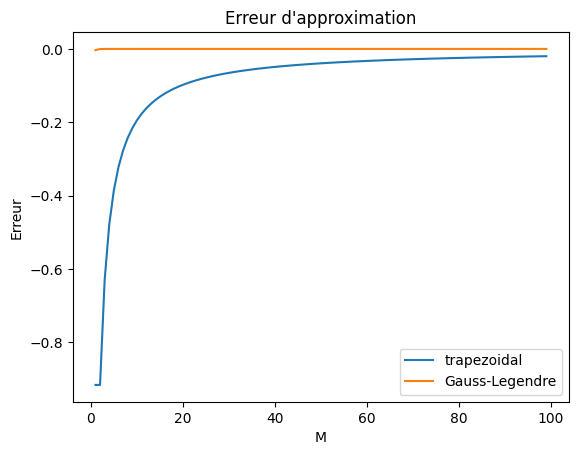

In [9]:
def trapezoidal(f, a, b, M):
  l = np.linspace(a, b, M)
  h = (b-a)/M
  return h * ( 0.5 * f(a) + sum(f(l)[1:-1]) + 0.5 * f(b) )

xmax = 100
plt.plot([i for i in range(1, xmax)], [trapezoidal(f, a, b, i) - np.log(5/2) for i in range(1, xmax)], label = "trapezoidal")
plt.plot([i for i in range(1, xmax)], [gauss_legendre_vectorized(f, 2, M, a, b) - np.log(5/2)  for M in range(1, xmax)], label = 'Gauss-Legendre')
plt.legend()
plt.title("Erreur d'approximation")
plt.xlabel("M")
plt.ylabel("Erreur")
plt.show()

### Estimation of the normal cumulative distribution function. 

#### Avec les polynomes de Hermite

La fonction "scipy.special.roots_hermite" renvoie les poids et polynomes d'Hermite associés à $w(x) = e^{-x^2}$. Or on a :

$\frac{1}{\sqrt{2  \pi}} \int_{-\infty}^{a} e^{-x^2 / 2} dx = \frac{1}{\sqrt{\pi}} \int 1_{x < a/\sqrt{2}} e^{-x^2} dx$

On choisit donc $f(x) = \frac{1}{\sqrt{\pi}} 1_{x < a/\sqrt{2}}$

$x_i$ les racines de $P_n$, polynome d'hermite d'ordre n.

$w_i = e^{-x_i^2}$

In [10]:
def f1(x, a):
  if x < a / 2**(0.5) :
    return 1 / (np.pi)**(0.5)
  else:
    return 0

In [11]:
def F_hermite(x, M):
    nodes, weights = scipy.special.roots_hermite(M)
    return np.sum([f1(nodes[i], x) * weights[i] for i in range(0, len(nodes))])

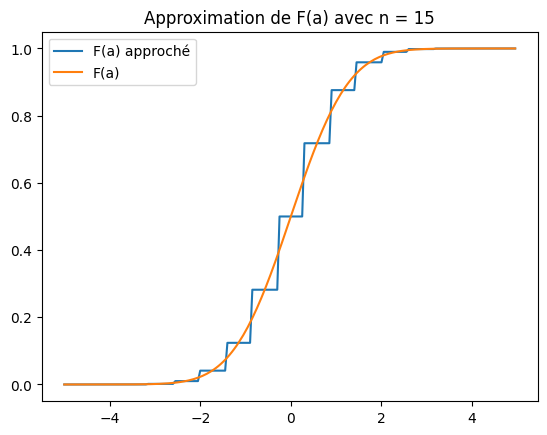

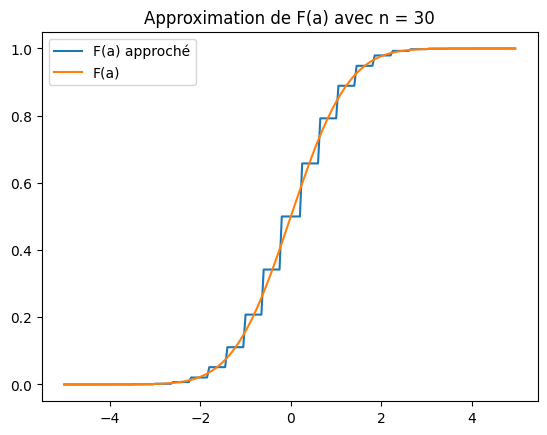

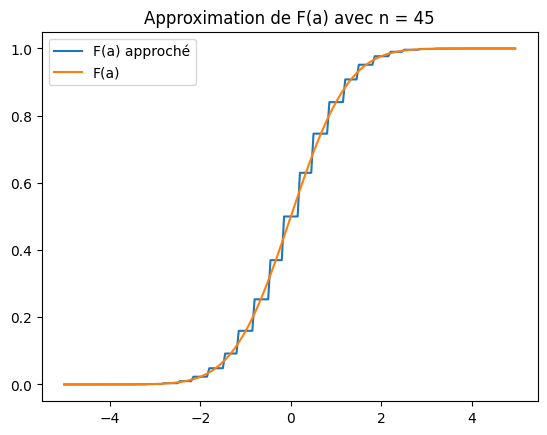

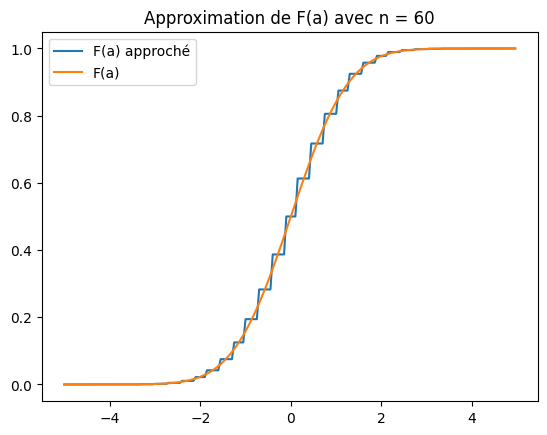

In [12]:
for j in range(1, 5):
  plt.title("Approximation de F(a) avec n = " + str(j * 15))
  plt.plot([(i/20) for i in range(-100, 100)], [F_hermite((i/20), 30 * j) for i in range(-100, 100)], label = 'F(a) approché')
  plt.plot([(i/20) for i in range(-100, 100)], [scipy.stats.norm.cdf(i/20) for i in range(-100, 100)], label = 'F(a)')
  plt.legend()
  plt.show()

#### Avec les polynomes de Legendre


En réécrivant l'intégrale :

 $\frac{1}{\sqrt{2  \pi}} \int_{-\infty}^{a} e^{-x^2 / 2} = 0.5 + \frac{1}{\sqrt{2  \pi}} \int_{0}^{a} e^{-x^2 / 2}$

 On se ramène donc au calcul d'une intégrale sur [0, a] (ou [a, 0] selon le signe de a.) et on utilise les fonctions définies précédement.

In [13]:
def f(x):
  return (1/(np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2))

In [14]:
def F_legendre(x, n):
  if x > 0:
    return 0.5 + gauss_legendre_simple(f, 0, x, n)
  else:
    return 0.5 - gauss_legendre_simple(f, 0, -x, n)

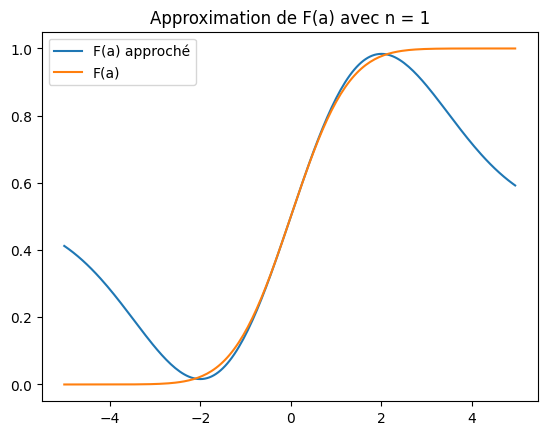

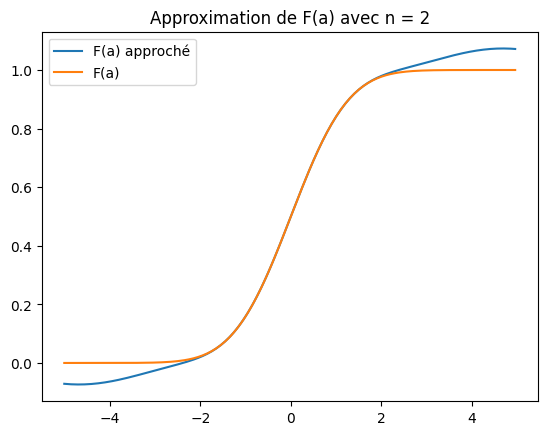

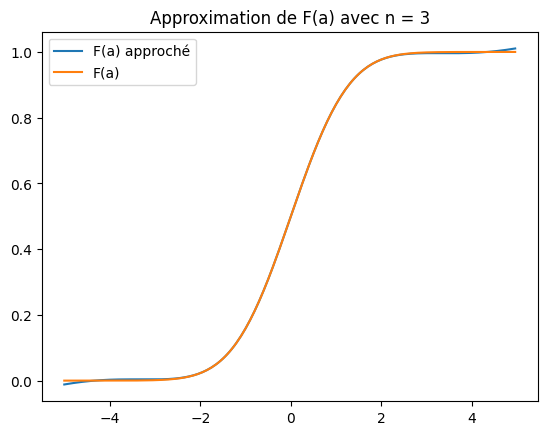

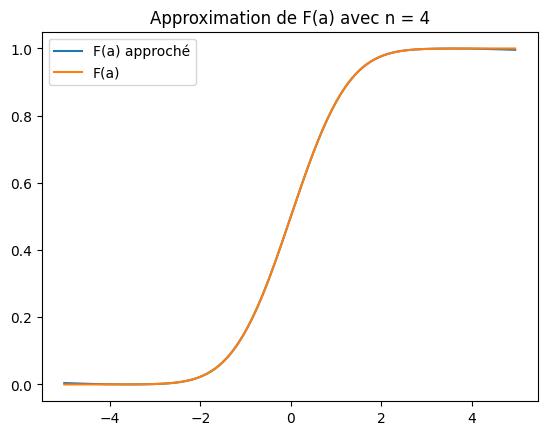

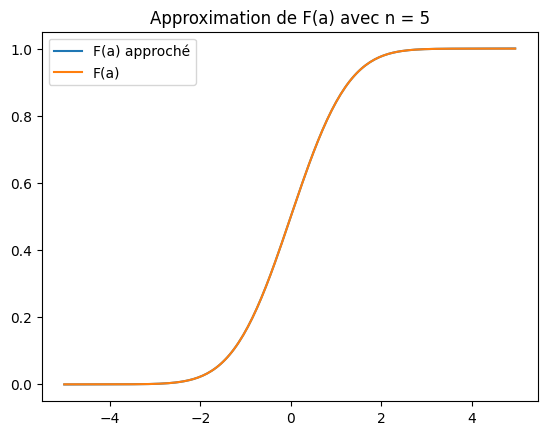

In [15]:
for j in range(1, 6):
  plt.title("Approximation de F(a) avec n = " + str(j))
  plt.plot([(i/20) for i in range(-100, 100)], [F_legendre((i/20), j) for i in range(-100, 100)], label = 'F(a) approché')
  plt.plot([(i/20) for i in range(-100, 100)], [scipy.stats.norm.cdf(i/20) for i in range(-100, 100)], label = 'F(a)')
  plt.legend()
  plt.show()

#### Avec les polynomes de Laguerre

Pour 0 < a, on a  :  
$\frac{1}{\sqrt{2  \pi}} \int_{a}^{+ ∞} e^{-x^2 / 2} dx = \frac{1}{\sqrt{2 \pi}} \int_{0.5 a ^ 2 }^{+∞} \frac{1}{\sqrt{t}} e^{-t} dt$

On peut donc utiliser les polynomes de Laguerre en choisissant $f(x) = \frac{1}{\sqrt{2 \pi  x} } 1_{x> 0.5 a^2}$ et en utilisant le fait que :

$\frac{1}{\sqrt{2  \pi}} \int_{a}^{+ ∞} e^{-x^2 / 2} dx = \frac{1}{\sqrt{2  \pi}} \int_{- ∞}^{-a} e^{-x^2 / 2} dx = 1 - \frac{1}{\sqrt{2  \pi}} \int_{- ∞}^{a} e^{-x^2 / 2} dx $ on peut se ramener systématiquement au cas précédent.

Les $(x_i)$ sont les racines des polynomes de Laguerre d'ordre n.

$w_i = \exp{(-x_i)}$


In [16]:
def f3(x, a):
  if x > 0.5 * (a**2):
    return 1 /   (2 * np.pi * x)**(0.5)
  return 0

In [17]:
def F_laguerre(x, n):
  nodes, weights = scipy.special.roots_laguerre(n)
  if x <= 0:
    return np.sum([f3(nodes[i], -x) * weights[i] for i in range(0, len(nodes))])
  else:
    return 1 - F_laguerre(-x, n)

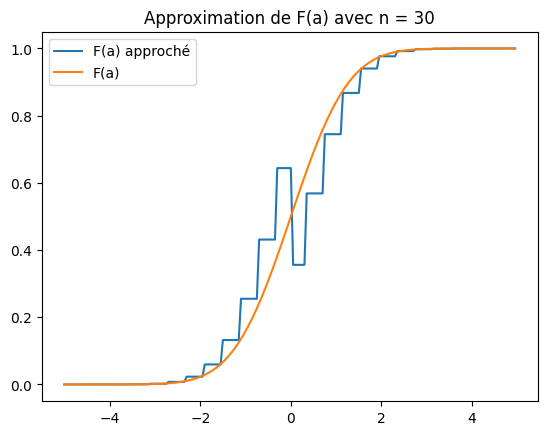

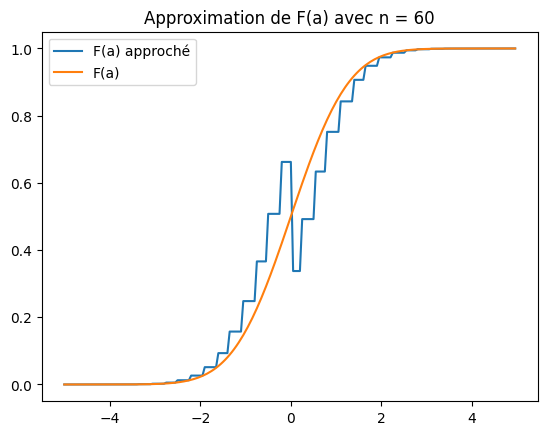

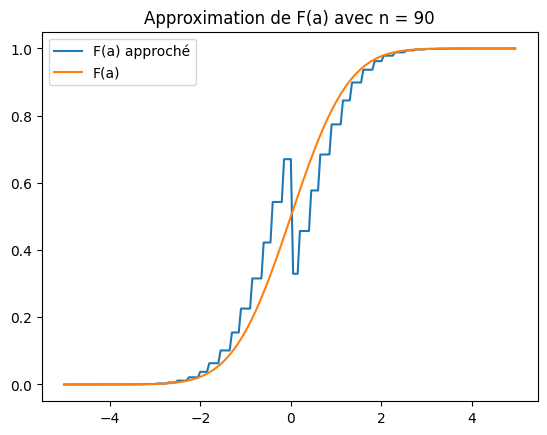

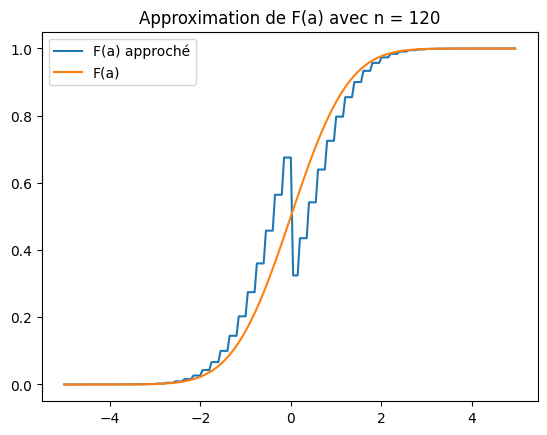

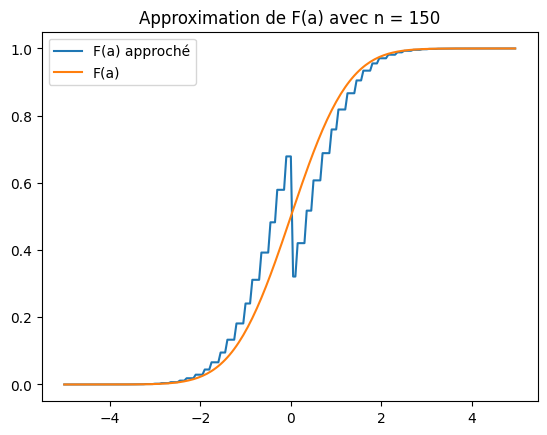

In [18]:
for j in range(1, 6):
  plt.title("Approximation de F(a) avec n = " + str(j * 30))
  plt.plot([(i/20) for i in range(-100, 100)], [F_laguerre((i/20), 30 * j) for i in range(-100, 100)], label = 'F(a) approché')
  plt.plot([(i/20) for i in range(-100, 100)], [scipy.stats.norm.cdf(i/20) for i in range(-100, 100)], label = 'F(a)')
  plt.legend()
  plt.show()

#### Error of each method

Pour évaluer la précision de la méthode, on affiche $max_{a \in [-5, 5]} |F_{approx}(a) - F(a)|$ en fonction de n.

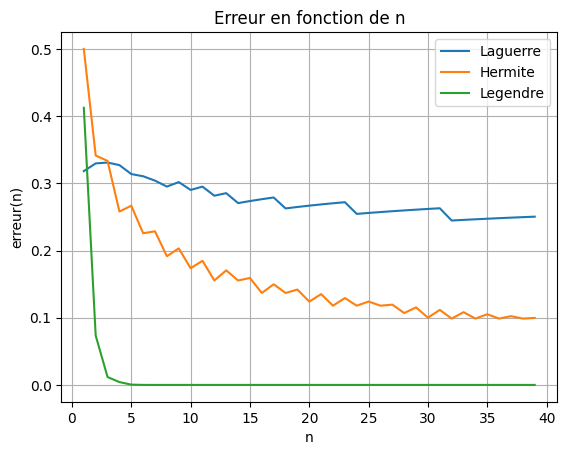

In [19]:
n_max = 40
plt.plot([i for i in range(1, n_max)], [max([abs(F_laguerre((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)], label = 'Laguerre')
plt.plot([i for i in range(1, n_max)], [max([abs(F_hermite((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)], label = 'Hermite')
plt.plot([i for i in range(1, n_max)], [max([abs(F_legendre((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)], label = 'Legendre')
plt.title("Erreur en fonction de n")
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("erreur(n)")
plt.show()


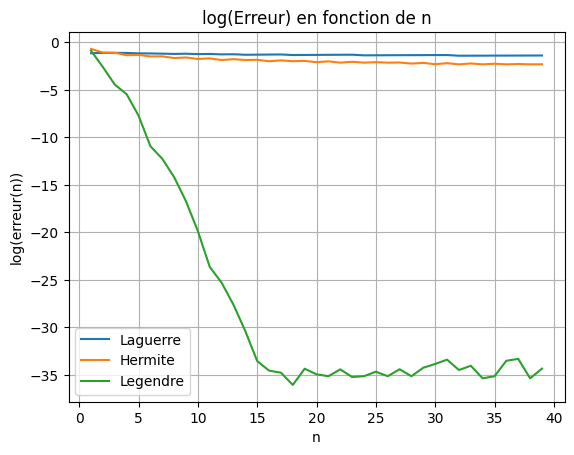

In [20]:
n_max = 40
plt.plot([i for i in range(1, n_max)], np.log([max([abs(F_laguerre((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)]), label = 'Laguerre')
plt.plot([i for i in range(1, n_max)], np.log([max([abs(F_hermite((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)]), label = 'Hermite')
plt.plot([i for i in range(1, n_max)], np.log([max([abs(F_legendre((i/20),j) - scipy.stats.norm.cdf(i/20)) for i in range(-100, 100)]) for j in range(1, n_max)]), label = 'Legendre')
plt.title("log(Erreur) en fonction de n")
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("log(erreur(n))")
plt.show()